In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import silhouette_score



In [2]:
df = pd.read_csv('2019.csv')

In [3]:
# Select relevant features for clustering and prediction
features = ['Score', 'GDP per capita', 'Country or region']
X = df[features]
df = X

In [4]:
# Standardize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X[['Score', 'GDP per capita']])

# clustering

In [5]:
# Bayesian Gaussian Mixture model for clustering
bgm = BayesianGaussianMixture(n_components=2, random_state=42) # You can adjust the number of components

# Fit the model to the training data
bgm.fit(X_scaled)

# Predict cluster assignments for the training data
cluster_assignments = bgm.predict(X_scaled)

# Add cluster assignments to the dataframe
df['cluster'] = cluster_assignments

In [6]:
# Predict Score based on cluster assignments
cluster_score_means = df.groupby('cluster')['Score'].mean()


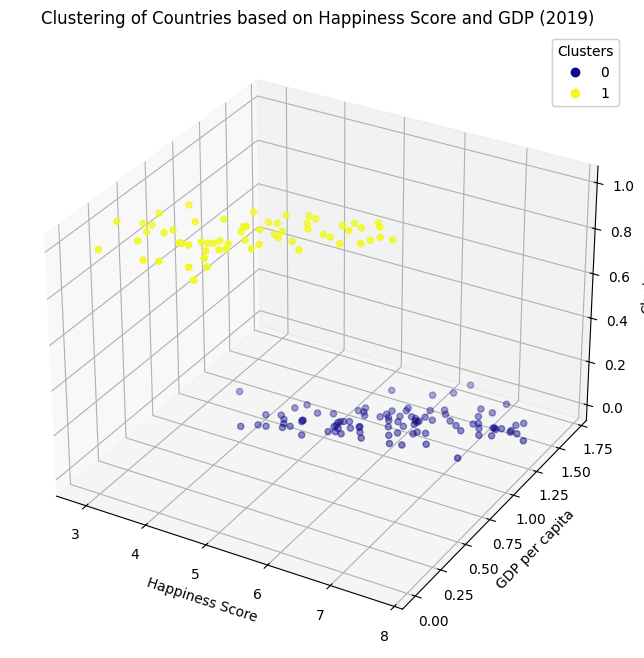

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D plot 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# scatter plot 
scatter = ax.scatter(df['Score'], df['GDP per capita'],
                     df['cluster'], c=df['cluster'], cmap='plasma')

# labels and title
ax.set_title('Clustering of Countries based on Happiness Score and GDP (2019)')
ax.set_xlabel('Happiness Score')
ax.set_ylabel('GDP per capita')
ax.set_zlabel('Cluster')

# showing color bar and legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


# silhouette score

In [8]:
silhouette_avg = silhouette_score(X_scaled, df['cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.40931489727247883


# db index

In [9]:
from sklearn.metrics import davies_bouldin_score

# Removing noise points labeled as -1 for DBI calculation
bayesnet_labels = df['cluster']

# Filtering out the noise (-1) points for DBI calculation
filtered_data = df[bayesnet_labels != -1]
X_filtered = scaler.fit_transform(filtered_data[['Score', 'GDP per capita']])
labels_filtered = filtered_data['cluster']

# Calculating the Davies-Bouldin Index
dbi = davies_bouldin_score(X_filtered, labels_filtered)
print(f'Davies-Bouldin Index: {dbi}')

Davies-Bouldin Index: 0.8415636422906996


In [10]:
dbi = davies_bouldin_score(X_filtered, labels_filtered)
print(f'Davies-Bouldin Index: {dbi}')

Davies-Bouldin Index: 0.8415636422906996
